In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import altair as alt
import datetime as dt
!pip install vega_datasets

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


You should consider upgrading via the '/Users/shelbyjouppi/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('Medicaid_Enrolled_Provider_Listing.csv')

#cleaning columns
df.columns = df.columns.str.lower().str.replace(" ","_")
df.enrollment_begin_date = pd.to_datetime(df.enrollment_begin_date, format="%m/%d/%Y")

#filtering to NYC
nyc = ['QUEENS','KINGS','NEW YORK','RICHMOND','BRONX']
df = df.query('county.isin(@nyc)')
df.head()

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,medicaid_provider_id,npi,provider_or_facility_name,medicaid_type,profession_or_service,provider_specialty,service_address,city,state,zip_code,county,telephone,latitude,longitude,enrollment_begin_date,next_anticipated_revalidation_date,file_date,medically_fragile_children_and_adults_directory_ind,provider_email
2,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,162 19 76TH AVE,FLUSHING,NY,11366-1133,QUEENS,NaN,40.72670,-73.79774,1979-02-01,12/11/2020,08/01/2022,N,NaN
3,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,16208 77TH AVE,FLUSHING,NY,11366-1022,QUEENS,NaN,40.72416,-73.80730,1979-02-01,12/11/2020,08/01/2022,N,NaN
4,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,1810 AVENUE H,BROOKLYN,NY,11230-1820,KINGS,NaN,40.63024,-73.95893,1979-02-01,12/11/2020,08/01/2022,N,NaN
5,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,217 E 87TH ST YOUTH RES CTR,NEW YORK,NY,10128-3200,NEW YORK,NaN,40.77927,-73.95272,1979-02-01,12/11/2020,08/01/2022,N,NaN
6,13098,1.477673e+09,JCCA FH DIVISION,FFS,CHILD (FOSTER) CARE AGENCIES,NaN,345 MADISON AVE FOSTER HOME DIVISION,NEW YORK,NY,10017-3701,NEW YORK,NaN,40.75433,-73.97803,1979-02-01,12/11/2020,08/01/2022,N,NaN


In [3]:
df.dtypes

medicaid_provider_id                                            int64
npi                                                           float64
provider_or_facility_name                                      object
medicaid_type                                                  object
profession_or_service                                          object
provider_specialty                                             object
service_address                                                object
city                                                           object
state                                                          object
zip_code                                                       object
county                                                         object
telephone                                                     float64
latitude                                                      float64
longitude                                                     float64
enrollment_begin_dat

In [4]:
df.profession_or_service.value_counts().tail(50)

PHARMACY                                   3709
SUPERVISING PHARMACIST                     3227
OPTOMETRIST                                3138
PODIATRIST                                 2703
MEDICAL EQUIPMENT SUPPLIERS & DEALER       2564
MENTAL HEALTH REHABILITATION               2356
OCCUPATIONAL THERAPIST                     1806
CASE MANAGEMENT SERVICES                   1799
NON-MEDICAL TRANSPORTATION                 1605
LABORATORY                                 1369
REGISTERED NURSE                           1368
HOSPITAL - INPATIENT                       1350
NURSE MIDWIFE                              1230
AUDIOLOGIST                                 817
LICENSED PRACTICAL NURSE                    805
PERSONAL CARE SERVICES                      736
HOME HEALTH CARE                            664
OPTICAL ESTABLISHMENT                       558
DENTAL GROUP PRACTICE                       550
WAIVER SERVICES                             299
COMMUNITY SUPPORT (OPWDD)               

In [5]:
childClinics = df.query('provider_specialty == "MENTAL HLTH SVCS CHILD" and profession_or_service == "OUTPATIENT CLINIC"')

<AxesSubplot:xlabel='enrollment_begin_date'>

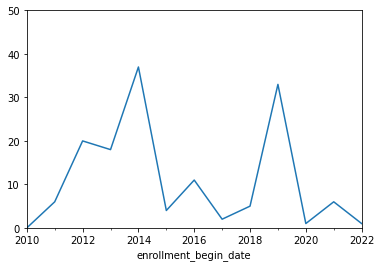

In [11]:
childClinics.resample("Y", on="enrollment_begin_date").size().plot(ylim=[0,50],xlim=["2010","2022"])

In [14]:
childClinics.query('enrollment_begin_date > "2018-12-31" and enrollment_begin_date < "2020-01-01"')

,medicaid_provider_id,npi,provider_or_facility_name,medicaid_type,profession_or_service,provider_specialty,service_address,city,state,zip_code,county,telephone,latitude,longitude,enrollment_begin_date,next_anticipated_revalidation_date,file_date,medically_fragile_children_and_adults_directory_ind,provider_email
13751,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,# 3/3/89 774 MANOR RD,STATEN ISLAND,NY,10314-7038,RICHMOND,NaN,40.60750,-74.12115,2019-01-01,01/07/2026,08/01/2022,N,NaN
13752,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,10 KINGSLEY PL RM 207,STATEN ISLAND,NY,10301-2826,RICHMOND,NaN,40.63567,-74.08875,2019-01-01,01/07/2026,08/01/2022,N,NaN
13753,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,100 TOMPKINS AVE,STATEN ISLAND,NY,10304-2627,RICHMOND,NaN,40.62297,-74.07889,2019-01-01,01/07/2026,08/01/2022,N,NaN
13754,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,101 WARREN ST,STATEN ISLAND,NY,10304-2501,RICHMOND,NaN,40.62058,-74.08159,2019-01-01,01/07/2026,08/01/2022,N,NaN
13755,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,11 CLOVE LAKE PL,STATEN ISLAND,NY,10310-2712,RICHMOND,NaN,40.62812,-74.11723,2019-01-01,01/07/2026,08/01/2022,N,NaN
13756,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,110 HENDERSON AVE ANN ERIKA OMH CD/CL,STATEN ISLAND,NY,10301-2196,RICHMOND,9.990880e+09,40.64061,-74.09523,2019-01-01,01/07/2026,08/01/2022,N,NaN
13757,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,1130 SOUTH AVE,STATEN ISLAND,NY,10314-3410,RICHMOND,NaN,40.61151,-74.17632,2019-01-01,01/07/2026,08/01/2022,N,NaN
13758,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,1130 SOUTH AVE FL 2,STATEN ISLAND,NY,10314-3410,RICHMOND,NaN,40.61151,-74.17632,2019-01-01,01/07/2026,08/01/2022,N,NaN
13759,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,1200 MANOR RD,STATEN ISLAND,NY,10314-7027,RICHMOND,7.188183e+09,40.59502,-74.12520,2019-01-01,01/07/2026,08/01/2022,N,NaN
13760,248820,1.740389e+09,RICHMOND UNIVERSITY MED CTR,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,140 PALMA DR,STATEN ISLAND,NY,10304-3400,RICHMOND,NaN,40.61150,-74.08348,2019-01-01,01/07/2026,08/01/2022,N,NaN


In [6]:
childPsych = df.query('provider_specialty == "CHILD PSYCHIATRY"')

In [7]:
socialWork = df.query('profession_or_service == "CLINICAL SOCIAL WORKER"')

<AxesSubplot:xlabel='enrollment_begin_date'>

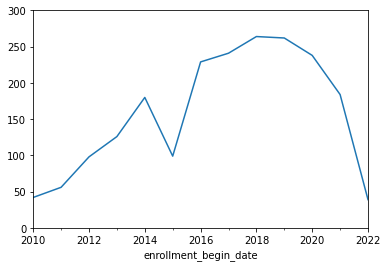

In [9]:
childPsych.resample("Y", on="enrollment_begin_date").size() \
    .plot(ylim=[0,300],xlim=["2010","2022"])

In [10]:
childPsych.query('enrollment_begin_date > "2020-12-31"').drop_duplicates('medicaid_provider_id')

,medicaid_provider_id,npi,provider_or_facility_name,medicaid_type,profession_or_service,provider_specialty,service_address,city,state,zip_code,county,telephone,latitude,longitude,enrollment_begin_date,next_anticipated_revalidation_date,file_date,medically_fragile_children_and_adults_directory_ind,provider_email
133728,1542098,1.114526e+09,SYDNOR-HOLMES TANYA MONIQUE,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,8900 VAN WYCK EXPRESSWAY C BLDG PSYCHIAT,JAMAICA,NY,11418-2832,QUEENS,7.182067e+09,40.69914,-73.83367,2021-08-18,02/02/2027,08/01/2022,N,NaN
191929,1974643,1.811165e+09,RYALS JEAN FATIMA,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,134 N 4TH ST,BROOKLYN,NY,11249-3296,KINGS,6.464508e+09,40.71604,-73.95949,2021-03-20,10/13/2026,08/01/2022,N,NaN
232385,2301366,1.134740e+09,JOHN ALEYAMMA,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,111 E 210TH ST,BRONX,NY,10467-2401,BRONX,8.666338e+09,40.88002,-73.88072,2021-04-09,09/10/2026,08/01/2022,N,NaN
247755,2410988,1.871252e+09,KURJAKOVIC FUAD,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,2015 GRAND CONCOURSE,BRONX,NY,10453-4303,BRONX,7.185838e+09,40.85151,-73.90472,2021-11-02,03/23/2027,08/01/2022,N,NaN
248611,2418835,1.265733e+09,RUIZ JOSE MIGUEL,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,132 THOMPSON ST,NEW YORK,NY,10012-5308,NEW YORK,3.472471e+09,40.72638,-74.00124,2021-10-01,03/17/2027,08/01/2022,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863648,7169684,1.871265e+09,LIEBNER JAMI L,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,3512 QUENTIN RD STE 110,BROOKLYN,NY,11234-4245,KINGS,8.002753e+09,40.61415,-73.93737,2022-03-30,07/19/2027,08/01/2022,N,NaN
863814,7173559,1.740948e+09,WILLIAMS-STEWART CHARISSE NICOLE,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,315 BEACH 9TH ST,FAR ROCKAWAY,NY,11691-5507,QUEENS,7.185341e+09,40.59804,-73.74471,2022-04-07,07/20/2027,08/01/2022,N,NaN
864714,7189040,1.376215e+09,PEREZ GISELLE SAMANTHA,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,1000 10TH AVE DEPARTNENT OF PSYCHIATRY,NEW YORK,NY,10019-1147,NEW YORK,2.125234e+09,40.77006,-73.98773,2022-04-06,07/28/2027,08/01/2022,N,NaN
865032,7190976,1.205594e+09,EHIZOKHALE HENRY,FFS,NURSE PRACTITIONER,CHILD PSYCHIATRY,134 N 4TH ST,BROOKLYN,NY,11249-3296,KINGS,6.464508e+09,40.71604,-73.95949,2022-04-09,07/29/2027,08/01/2022,N,NaN


In [18]:
childPsych.drop_duplicates('provider_or_facility_name').profession_or_service.value_counts()

NURSE PRACTITIONER    625
PHYSICIAN             360
Name: profession_or_service, dtype: int64

In [28]:
childPsychCounty = childPsych.groupby('provider_or_facility_name').county.value_counts().to_frame().rename({'county':'locations'},axis=1).reset_index()

In [35]:
childPsychCountyMax = childPsychCounty.sort_values(['provider_or_facility_name','locations'],ascending=False).drop_duplicates(subset='provider_or_facility_name')

In [37]:
childPsychCountyMax.county.value_counts()

NEW YORK    318
KINGS       243
BRONX       214
QUEENS      182
RICHMOND     28
Name: county, dtype: int64

In [42]:
df[df['provider_specialty'] == "PSYCHIATRY (NOT CHILD)"].drop_duplicates('provider_or_facility_name').profession_or_service.value_counts()

PHYSICIAN             2488
NURSE PRACTITIONER     626
Name: profession_or_service, dtype: int64

<AxesSubplot:xlabel='enrollment_begin_date'>

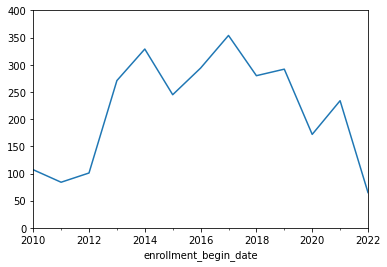

In [12]:
psychologists = df.query('profession_or_service == "CLINICAL PSYCHOLOGIST"')
psychologists.resample("Y", on="enrollment_begin_date").size() \
    .plot(ylim=[0,400],xlim=["2010","2022"])

<AxesSubplot:xlabel='enrollment_begin_date'>

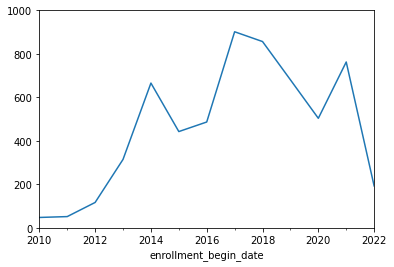

In [13]:
socialWork.resample("Y", on="enrollment_begin_date").size() \
    .plot(ylim=[0,1000],xlim=["2010","2022"])

<AxesSubplot:xlabel='enrollment_begin_date'>

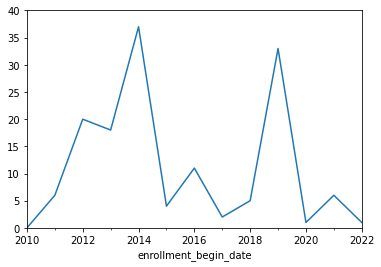

In [19]:
childClinics.resample("Y", on="enrollment_begin_date").size() \
    .plot(ylim=[0,40],xlim=["2010","2022"])

In [31]:
childClinicEnrollment = childClinics.resample("Y", on="enrollment_begin_date").size().reset_index().rename({'enrollment_begin_date':'date',0:'childClinics'},axis=1)
socialWorkEnrollment = socialWork.resample("Y", on="enrollment_begin_date").size().reset_index().rename({'enrollment_begin_date':'date',0:'socialWorkers'},axis=1)
pediatricianEnrollment = pediatricians.resample("Y", on="enrollment_begin_date").size().reset_index().rename({'enrollment_begin_date':'date',0:'pediatricians'},axis=1)
psychologistEnrollment = psychologists.resample("Y", on="enrollment_begin_date").size().reset_index().rename({'enrollment_begin_date':'date',0:'psychologists'},axis=1)
childPsychiatristEnrollment = childPsych.resample("Y", on="enrollment_begin_date").size().reset_index().rename({'enrollment_begin_date':'date',0:'childPsychiatrists'},axis=1)

In [35]:
from functools import reduce
dfList = [childClinicEnrollment, socialWorkEnrollment, pediatricianEnrollment, psychologistEnrollment, childPsychiatristEnrollment]
dfList
providerEnrollment = reduce(lambda x, y: pd.merge(x, y, on = 'date',how='outer'), dfList)

In [41]:
providerEnrollment = providerEnrollment.query('date > "2009-12-31"')

In [71]:
providerEnrollment.dtypes

date                    int64
childClinics          float64
socialWorkers         float64
pediatricians           int64
psychologists         float64
childPsychiatrists      int64
dtype: object

In [45]:
providerEnrollmentMelt = pd.melt(providerEnrollment, id_vars='date')
providerEnrollmentMelt

,date,variable,value
0,2010-12-31,childClinics,0.0
1,2011-12-31,childClinics,6.0
2,2012-12-31,childClinics,20.0
3,2013-12-31,childClinics,18.0
4,2014-12-31,childClinics,37.0
...,...,...,...
60,2018-12-31,childPsychiatrists,264.0
61,2019-12-31,childPsychiatrists,262.0
62,2020-12-31,childPsychiatrists,238.0
63,2021-12-31,childPsychiatrists,184.0


In [59]:
providerEnrollmentMelt.date = providerEnrollmentMelt.date.dt.year

In [69]:
providerEnrollmentMelt.dtypes

date          int64
variable     object
value       float64
dtype: object

In [74]:
lines = (
    alt.Chart(providerEnrollmentMelt)
    .mark_line()
    .encode(x="date:O", y="value", color="variable")
)

lines

alt.Chart(...)

In [80]:
split = alt.Chart(providerEnrollmentMelt).mark_area().encode(
    x='date:O',
    y='value:Q',
    color='variable:N',
    row=alt.Row('variable:N')
).properties(height=50, width=400)


In [82]:
alt.Chart(providerEnrollmentMelt).mark_bar().encode(
    column='variable:N',
    x='date:O',
    y='value:Q',
    color='variable:N'
).properties(width=220)

alt.Chart(...)

In [81]:
split

alt.Chart(...)

In [65]:
import altair as alt
from vega_datasets import data

source = data.movies()
source

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


In [ ]:
alt.Chart(providerEnrollmentMelt)

In [55]:
childClinics.query('enrollment_begin_date > "2019-12-31"')

,medicaid_provider_id,npi,provider_or_facility_name,medicaid_type,profession_or_service,provider_specialty,service_address,city,state,zip_code,county,telephone,latitude,longitude,enrollment_begin_date,next_anticipated_revalidation_date,file_date,medically_fragile_children_and_adults_directory_ind,provider_email
702801,5270306,1.700121e+09,HAMASPIK OF KINGS COUNTY INC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,295 DIVISION AVE,BROOKLYN,NY,11211-7549,KINGS,7.183878e+09,40.70715,-73.95591,2021-06-28,02/10/2027,08/01/2022,N,NaN
702802,5270306,1.700121e+09,HAMASPIK OF KINGS COUNTY INC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,4102 13TH AVE,BROOKLYN,NY,11219-1389,KINGS,7.184010e+09,40.63955,-73.98756,2021-06-28,02/10/2027,08/01/2022,N,NaN
702803,5270306,1.700121e+09,HAMASPIK OF KINGS COUNTY INC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,4102 14TH AVE,BROOKLYN,NY,11219-1401,KINGS,7.183878e+09,40.63795,-73.98564,2021-06-28,02/10/2027,08/01/2022,N,NaN
778453,6057987,1.104457e+09,NEW YORK COUNSELING FOR CHANGE LLC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,3046 NORTHERN BLVD,LONG ISLAND CITY,NY,11101-2816,QUEENS,7.184296e+09,40.74949,-73.93590,2020-03-09,09/08/2025,08/01/2022,N,NaN
819966,6559324,1.447851e+09,INTEGRITY CARE SERVICES INC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,1426 39TH ST,BROOKLYN,NY,11218-3618,KINGS,7.182542e+09,40.63855,-73.98304,2021-02-22,07/29/2026,08/01/2022,N,NaN
836950,6795940,1.679245e+09,ATHENAPSYCH LLC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,2825 THIRD AVE STE 402,BRONX,NY,10455-4066,BRONX,7.185208e+09,40.81572,-73.91846,2021-08-02,05/10/2027,08/01/2022,N,NaN
840380,6834899,1.407418e+09,HOUSING WORKS SERVICES INC,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,743 E 9TH ST # 749 OMH DEPT,NEW YORK,NY,10009-5335,NEW YORK,7.184087e+09,40.72485,-73.97671,2022-01-01,01/03/2027,08/01/2022,N,NaN
860785,7127824,1.154095e+09,REVCORE RECOVERY CTR OF MANHATTAN,FFS,OUTPATIENT CLINIC,MENTAL HLTH SVCS CHILD,15 2ND AVE FL 3,BROOKLYN,NY,11215-2711,KINGS,7.185146e+09,40.67464,-73.99154,2021-09-13,06/16/2027,08/01/2022,N,NaN


In [62]:
pediatricians

,medicaid_provider_id,npi,provider_or_facility_name,medicaid_type,profession_or_service,provider_specialty,service_address,city,state,zip_code,county,telephone,latitude,longitude,enrollment_begin_date,next_anticipated_revalidation_date,file_date,medically_fragile_children_and_adults_directory_ind,provider_email
33,98691,1.326112e+09,EDEN ALVIN N,FFS,PHYSICIAN,PEDIATRICS,10721 QUEENS BLVD STE 7,FOREST HILLS,NY,11375-4451,QUEENS,7.182619e+09,40.72157,-73.84428,1989-01-05,06/29/2021,08/01/2022,N,NaN
45,118016,1.457423e+09,KESSLER RUTH E,FFS,PHYSICIAN,PEDIATRICS,120 E 75TH ST # 1C,NEW YORK,NY,10021-3240,NEW YORK,2.127393e+09,40.77274,-73.96190,1977-11-01,05/09/2021,08/01/2022,N,NaN
56,119264,1.619962e+09,WILDES JEROME,OPRA,PHYSICIAN,PEDIATRICS,15801 CROSSBAY BLVD,HOWARD BEACH,NY,11414-3140,QUEENS,7.188353e+09,40.66071,-73.83984,2017-08-24,07/20/2023,08/01/2022,N,NaN
118,131613,1.043357e+09,RELLA VINCENT JOSEPH,FFS,PHYSICIAN,PEDIATRICS,3105 ROBERTS AVE FL 1,BRONX,NY,10461-5140,BRONX,7.188637e+09,40.84636,-73.82859,2015-10-22,03/06/2022,08/01/2022,N,NaN
193,137086,1.356424e+09,STEINFELD PHILIP S,FFS,PHYSICIAN,PEDIATRICS,26901 76TH AVE,NEW HYDE PARK,NY,11040-1433,QUEENS,7.184707e+09,40.75188,-73.70843,2014-01-22,11/14/2023,08/01/2022,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864329,7186583,1.891157e+09,MILLER JONATHAN MICHAEL,FFS,PHYSICIAN,PEDIATRICS,270 W 231ST ST STE 101A,BRONX,NY,10463-3904,BRONX,2.123056e+09,40.88003,-73.90718,2022-03-26,07/27/2027,08/01/2022,N,NaN
864330,7186583,1.891157e+09,MILLER JONATHAN MICHAEL,FFS,PHYSICIAN,PEDIATRICS,3959 BROADWAY,NEW YORK,NY,10032-1559,NEW YORK,2.123056e+09,40.83947,-73.94106,2022-03-26,07/27/2027,08/01/2022,N,NaN
864916,7190536,1.679051e+09,REVELO ESCOBAR JORGE MANUEL,FFS,PHYSICIAN,PEDIATRICS,7901 BROADWAY RM A1-19,ELMHURST,NY,11373-1329,QUEENS,7.183345e+09,40.74512,-73.88563,2022-04-29,07/29/2027,08/01/2022,N,NaN
864919,7190545,1.255533e+09,EYSSALLENNE ANTONIA PATRICIA,FFS,PHYSICIAN,PEDIATRICS,14015 B SANFORD AVE FL 2,FLUSHING,NY,11355-2557,QUEENS,7.184509e+09,40.75720,-73.82652,2022-03-26,07/29/2027,08/01/2022,N,NaN


<AxesSubplot:xlabel='enrollment_begin_date'>

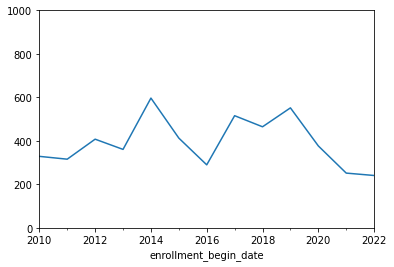

In [29]:
pediatricians = df.query('provider_specialty == "PEDIATRICS"')
pediatricians.resample("Y", on="enrollment_begin_date").size() \
    .plot(ylim=[0,1000],xlim=["2010","2022"])